# Import Python Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import category_encoders as ce
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import KMeansSMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import category_encoders as ce
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import KMeansSMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier


%matplotlib inline

import pandas as pd
from pandas import read_csv

import numpy as np
from numpy import isnan

import pickle5 as pickle
import os
import random

import matplotlib.pyplot as plt

from collections import Counter

import time

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
# from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit

from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

import seaborn as sns

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from imblearn.pipeline import Pipeline

# from mlxtend.evaluate import bias_variance_decomp

from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load the Data

In [3]:
# Bring the 14619 rows and 306 features
features = '/Users/shobhasankar/W210/models/all_300_features.csv'
df_300 = pd.read_csv(features)
print(df_300.shape)
df_300.head()

(14619, 309)


,Unnamed: 0,cwa_determination,da_number,district,longitude,latitude,county,state,elevation_mean_2500m,elevation_stdev_2500m,elevation_max_2500m,elevation_min_2500m,slope_mean_2500m,slope_stdev_2500m,slope_max_2500m,slope_min_2500m,seasonality_mean_2500m,seasonality_stdev_2500m,seasonality_max_2500m,seasonality_min_2500m,recurrence_mean_2500m,recurrence_stdev_2500m,recurrence_max_2500m,recurrence_min_2500m,transition_0_2500m,transition_1_2500m,transition_2_2500m,transition_3_2500m,transition_4_2500m,transition_5_2500m,transition_6_2500m,transition_7_2500m,transition_8_2500m,transition_9_2500m,elevation_mean_200m,elevation_stdev_200m,elevation_max_200m,elevation_min_200m,slope_mean_200m,slope_stdev_200m,slope_max_200m,slope_min_200m,seasonality_mean_200m,seasonality_stdev_200m,seasonality_max_200m,seasonality_min_200m,recurrence_mean_200m,recurrence_stdev_200m,recurrence_max_200m,recurrence_min_200m,transition_0_200m,transition_1_200m,transition_2_200m,transition_3_200m,transition_4_200m,transition_5_200m,transition_6_200m,transition_7_200m,transition_8_200m,transition_9_200m,slopegradd,slopegradw,brockdepmi,wtdepannmi,wtdepaprju,flodfreqdc,flodfreqma,pondfreqpr,aws025wta,aws050wta,aws0100wta,aws0150wta,drclassdcd,drclasswet,hydgrpdcd,iccdcd,iccdcdpct,niccdcd,niccdcdpct,engdwobdcd,engdwbdcd,engdwbll,engdwbml,engstafdcd,engstafll,engstafml,engsldcd,engsldcp,englrsdcd,engcmssdcd,engcmssmp,urbrecptdc,urbrecptwt,forpehrtdc,hydclprs,awmmfpwwta,wb_area_sum_2500m,wb_gnis_name_ind_count_2500m,wb_ftype_artificialpath_2500m,wb_ftype_canalditch_2500m,wb_ftype_coastline_2500m,wb_ftype_connector_2500m,wb_ftype_pipeline_2500m,wb_ftype_streamriver_2500m,fl_areasqkm_sum_2500m,fl_gnis_name_ind_count_2500m,fl_totdasqkm_sum_2500m,fl_flow_type_count_2500m,fl_streamorde_sum_2500m,fl_intephem_sum_2500m,fl_startflag_sum_2500m,fl_divergence_sum_2500m,fl_length_sum_2500m,fl_ftype_artificialpath_2500m,fl_ftype_canalditch_2500m,fl_ftype_coastline_2500m,fl_ftype_connector_2500m,fl_ftype_pipeline_2500m,fl_ftype_streamriver_2500m,wb_area_sum_200m,wb_gnis_name_ind_count_200m,wb_ftype_artificialpath_200m,wb_ftype_canalditch_200m,wb_ftype_coastline_200m,wb_ftype_connector_200m,wb_ftype_pipeline_200m,wb_ftype_streamriver_200m,fl_areasqkm_sum_200m,fl_gnis_name_ind_count_200m,fl_totdasqkm_sum_200m,fl_flow_type_count_200m,fl_streamorde_sum_200m,fl_intephem_sum_200m,fl_startflag_sum_200m,fl_divergence_sum_200m,fl_length_sum_200m,fl_ftype_artificialpath_200m,fl_ftype_canalditch_200m,fl_ftype_coastline_200m,fl_ftype_connector_200m,fl_ftype_pipeline_200m,fl_ftype_streamriver_200m,nwi_feature_count_200m,nwi_wetland_list_200m,nwi_lake_200m,nwi_riverine_200m,nwi_freshwater_pond_200m,nwi_freshwater_emergent_wetland_200m,nwi_freshwater_forested_200m,nwi_shrub_wetland_200m,nwi_other_200m,nwi_estuarine_and_marine_wetland_200m,nwi_estuarine_and_marine_deepwater_200m,nwi_SYSTEM_NAME_estuarine_200m,nwi_SYSTEM_NAME_lacustrine_200m,nwi_SYSTEM_NAME_marine_200m,nwi_SYSTEM_NAME_palustrine_200m,nwi_SYSTEM_NAME_riverine_200m,nwi_CLASS_NAME_aquatic_bed_200m,nwi_CLASS_NAME_emergent_200m,nwi_CLASS_NAME_forested_200m,nwi_CLASS_NAME_reef_200m,nwi_CLASS_NAME_rock_bottom_200m,nwi_CLASS_NAME_rocky_shore_200m,nwi_CLASS_NAME_scrub-shrub_200m,nwi_CLASS_NAME_streambed_200m,nwi_CLASS_NAME_unconsolidated_bottom_200m,nwi_CLASS_NAME_unconsolidated_shore_200m,nwi_CLASS_NAME_zzz_200m,nwi_SUBCLASS_NAME_algal_200m,nwi_SUBCLASS_NAME_broad-leaved_deciduous_200m,nwi_SUBCLASS_NAME_broad-leaved_evergreen_200m,nwi_SUBCLASS_NAME_cobble-gravel_200m,nwi_SUBCLASS_NAME_coral_200m,nwi_SUBCLASS_NAME_dead_200m,nwi_SUBCLASS_NAME_deciduous_200m,nwi_SUBCLASS_NAME_evergreen_200m,nwi_SUBCLASS_NAME_floating_vascular_200m,nwi_SUBCLASS_NAME_mud_200m,nwi_SUBCLASS_NAME_needle-leaved_deciduous_200m,nwi_SUBCLASS_NAME_needle-leaved_evergreen_200m,nwi_SUBCLASS_NAME_non_persistent_200m,nwi_SUBCLASS_NAME_persistent_200m,nwi_SUBCLASS_NAME_phragmites_australis_200m,nwi_SUBCLASS_NAME_rooted_vascular_200m,nwi_SUBCLASS_NAME_rubble_200m,nwi

In [4]:
df_sac = df_300[df_300["district"] == 'Charleston']
df_sac.reset_index(drop=True, inplace=True)
print(df_sac.shape)
df_sac.head()

(2072, 309)


,Unnamed: 0,cwa_determination,da_number,district,longitude,latitude,county,state,elevation_mean_2500m,elevation_stdev_2500m,elevation_max_2500m,elevation_min_2500m,slope_mean_2500m,slope_stdev_2500m,slope_max_2500m,slope_min_2500m,seasonality_mean_2500m,seasonality_stdev_2500m,seasonality_max_2500m,seasonality_min_2500m,recurrence_mean_2500m,recurrence_stdev_2500m,recurrence_max_2500m,recurrence_min_2500m,transition_0_2500m,transition_1_2500m,transition_2_2500m,transition_3_2500m,transition_4_2500m,transition_5_2500m,transition_6_2500m,transition_7_2500m,transition_8_2500m,transition_9_2500m,elevation_mean_200m,elevation_stdev_200m,elevation_max_200m,elevation_min_200m,slope_mean_200m,slope_stdev_200m,slope_max_200m,slope_min_200m,seasonality_mean_200m,seasonality_stdev_200m,seasonality_max_200m,seasonality_min_200m,recurrence_mean_200m,recurrence_stdev_200m,recurrence_max_200m,recurrence_min_200m,transition_0_200m,transition_1_200m,transition_2_200m,transition_3_200m,transition_4_200m,transition_5_200m,transition_6_200m,transition_7_200m,transition_8_200m,transition_9_200m,slopegradd,slopegradw,brockdepmi,wtdepannmi,wtdepaprju,flodfreqdc,flodfreqma,pondfreqpr,aws025wta,aws050wta,aws0100wta,aws0150wta,drclassdcd,drclasswet,hydgrpdcd,iccdcd,iccdcdpct,niccdcd,niccdcdpct,engdwobdcd,engdwbdcd,engdwbll,engdwbml,engstafdcd,engstafll,engstafml,engsldcd,engsldcp,englrsdcd,engcmssdcd,engcmssmp,urbrecptdc,urbrecptwt,forpehrtdc,hydclprs,awmmfpwwta,wb_area_sum_2500m,wb_gnis_name_ind_count_2500m,wb_ftype_artificialpath_2500m,wb_ftype_canalditch_2500m,wb_ftype_coastline_2500m,wb_ftype_connector_2500m,wb_ftype_pipeline_2500m,wb_ftype_streamriver_2500m,fl_areasqkm_sum_2500m,fl_gnis_name_ind_count_2500m,fl_totdasqkm_sum_2500m,fl_flow_type_count_2500m,fl_streamorde_sum_2500m,fl_intephem_sum_2500m,fl_startflag_sum_2500m,fl_divergence_sum_2500m,fl_length_sum_2500m,fl_ftype_artificialpath_2500m,fl_ftype_canalditch_2500m,fl_ftype_coastline_2500m,fl_ftype_connector_2500m,fl_ftype_pipeline_2500m,fl_ftype_streamriver_2500m,wb_area_sum_200m,wb_gnis_name_ind_count_200m,wb_ftype_artificialpath_200m,wb_ftype_canalditch_200m,wb_ftype_coastline_200m,wb_ftype_connector_200m,wb_ftype_pipeline_200m,wb_ftype_streamriver_200m,fl_areasqkm_sum_200m,fl_gnis_name_ind_count_200m,fl_totdasqkm_sum_200m,fl_flow_type_count_200m,fl_streamorde_sum_200m,fl_intephem_sum_200m,fl_startflag_sum_200m,fl_divergence_sum_200m,fl_length_sum_200m,fl_ftype_artificialpath_200m,fl_ftype_canalditch_200m,fl_ftype_coastline_200m,fl_ftype_connector_200m,fl_ftype_pipeline_200m,fl_ftype_streamriver_200m,nwi_feature_count_200m,nwi_wetland_list_200m,nwi_lake_200m,nwi_riverine_200m,nwi_freshwater_pond_200m,nwi_freshwater_emergent_wetland_200m,nwi_freshwater_forested_200m,nwi_shrub_wetland_200m,nwi_other_200m,nwi_estuarine_and_marine_wetland_200m,nwi_estuarine_and_marine_deepwater_200m,nwi_SYSTEM_NAME_estuarine_200m,nwi_SYSTEM_NAME_lacustrine_200m,nwi_SYSTEM_NAME_marine_200m,nwi_SYSTEM_NAME_palustrine_200m,nwi_SYSTEM_NAME_riverine_200m,nwi_CLASS_NAME_aquatic_bed_200m,nwi_CLASS_NAME_emergent_200m,nwi_CLASS_NAME_forested_200m,nwi_CLASS_NAME_reef_200m,nwi_CLASS_NAME_rock_bottom_200m,nwi_CLASS_NAME_rocky_shore_200m,nwi_CLASS_NAME_scrub-shrub_200m,nwi_CLASS_NAME_streambed_200m,nwi_CLASS_NAME_unconsolidated_bottom_200m,nwi_CLASS_NAME_unconsolidated_shore_200m,nwi_CLASS_NAME_zzz_200m,nwi_SUBCLASS_NAME_algal_200m,nwi_SUBCLASS_NAME_broad-leaved_deciduous_200m,nwi_SUBCLASS_NAME_broad-leaved_evergreen_200m,nwi_SUBCLASS_NAME_cobble-gravel_200m,nwi_SUBCLASS_NAME_coral_200m,nwi_SUBCLASS_NAME_dead_200m,nwi_SUBCLASS_NAME_deciduous_200m,nwi_SUBCLASS_NAME_evergreen_200m,nwi_SUBCLASS_NAME_floating_vascular_200m,nwi_SUBCLASS_NAME_mud_200m,nwi_SUBCLASS_NAME_needle-leaved_deciduous_200m,nwi_SUBCLASS_NAME_needle-leaved_evergreen_200m,nwi_SUBCLASS_NAME_non_persistent_200m,nwi_SUBCLASS_NAME_persistent_200m,nwi_SUBCLASS_NAME_phragmites_australis_200m,nwi_SUBCLASS_NAME_rooted_vascular_200m,nwi_SUBCLASS_NAME_rubble_200m,nwi

In [5]:
df_300 = df_300[df_300["district"] != 'Charleston']
df_300.head()
df_300.reset_index(drop=True, inplace=True)

# df_300[df_300["district"] == 'Charleston']

In [6]:
# SET-1 Drop
df_300.drop(['Unnamed: 0','da_number'],axis=1,inplace=True)
df_sac.drop(['Unnamed: 0','da_number'],axis=1,inplace=True)

print(df_300.shape)

(12547, 307)


In [7]:
#SSURGO categorical to numerical
# No data leak as categories are independent of rows
cat_to_nums = {"engstafdcd":{"Not rated":0,'Very limited':1, "Somewhat limited":2,
                                  'Not limited':3},
                "engdwobdcd":{"Not rated":0,'Very limited':1, "Somewhat limited":2,
                                  'Not limited':3},
                "engstafll":{"Not rated":0,'Very limited':1, "Somewhat limited":2,
                                  'Not limited':3},
                "engdwbdcd": {"Not rated":0,'Very limited':1, "Somewhat limited":2,
                                  'Not limited':3},
                "engdwbml": {"Not rated":0,'Very limited':1, "Somewhat limited":2,
                                  'Not limited':3},
                "engstafml": {"Not rated":0,'Very limited':1, "Somewhat limited":2,
                                  'Not limited':3},
                "englrsdcd": {"Not rated":0,'Very limited':1, "Somewhat limited":2,
                                  'Not limited':3},
                "engsldcd": {"Not rated":0,'Very limited':1, "Somewhat limited":2,
                                  'Not limited':3},
                "engdwbll": {"Not rated":0,'Very limited':1, "Somewhat limited":2,
                                  'Not limited':3},
                "engsldcp": {"Not rated":0,'Very limited':1, "Somewhat limited":2,
                                  'Not limited':3},
                "urbrecptdc": {"Not rated":0,'Very limited':1, "Somewhat limited":2,
                                  'Not limited':3},
                "engcmssdcd": {"Not rated":0,'Poor':1, "Fair":2, 'Good':3},
                "engcmssmp": {"Not rated":0,'Poor':1, "Fair":2, 'Good':3},
                "forpehrtdc": {"Not rated":0,'Slight':1, "Moderate":2,
                                  'Severe':3},
                "flodfreqma": {"None":0,'Very rare':1, "Rare":2,
                                  'Occasional':3, 'Frequent':4, 'Very frequent':5},
                "flodfreqdc": {"None":0,'Very rare':1, "Rare":2,
                                  'Occasional':3, 'Frequent':4, 'Very frequent':5},             
                "drclassdcd": {"Not rated":0,'Very poorly drained':1, "Poorly drained":2,
                               'Somewhat poorly drained':3, 'Moderately well drained':4,
                               'Well drained':5, 'Somewhat excessively drained':6,
                               'Excessively drained':7, 'Subaqueous':8},
                "drclasswet": {"Not rated":0,'Very poorly drained':1, "Poorly drained":2,
                               'Somewhat poorly drained':3, 'Moderately well drained':4,
                               'Well drained':5, 'Somewhat excessively drained':6,
                               'Excessively drained':7, 'Subaqueous':8},
                "hydgrpdcd": {'A':0,'B':1, "C":2, 'D':3, 'A/D':4, 'B/D':5, 'C/D':6}
               }
df_300 = df_300.replace(cat_to_nums)
df_sac = df_sac.replace(cat_to_nums)

df_300.head()

,cwa_determination,district,longitude,latitude,county,state,elevation_mean_2500m,elevation_stdev_2500m,elevation_max_2500m,elevation_min_2500m,slope_mean_2500m,slope_stdev_2500m,slope_max_2500m,slope_min_2500m,seasonality_mean_2500m,seasonality_stdev_2500m,seasonality_max_2500m,seasonality_min_2500m,recurrence_mean_2500m,recurrence_stdev_2500m,recurrence_max_2500m,recurrence_min_2500m,transition_0_2500m,transition_1_2500m,transition_2_2500m,transition_3_2500m,transition_4_2500m,transition_5_2500m,transition_6_2500m,transition_7_2500m,transition_8_2500m,transition_9_2500m,elevation_mean_200m,elevation_stdev_200m,elevation_max_200m,elevation_min_200m,slope_mean_200m,slope_stdev_200m,slope_max_200m,slope_min_200m,seasonality_mean_200m,seasonality_stdev_200m,seasonality_max_200m,seasonality_min_200m,recurrence_mean_200m,recurrence_stdev_200m,recurrence_max_200m,recurrence_min_200m,transition_0_200m,transition_1_200m,transition_2_200m,transition_3_200m,transition_4_200m,transition_5_200m,transition_6_200m,transition_7_200m,transition_8_200m,transition_9_200m,slopegradd,slopegradw,brockdepmi,wtdepannmi,wtdepaprju,flodfreqdc,flodfreqma,pondfreqpr,aws025wta,aws050wta,aws0100wta,aws0150wta,drclassdcd,drclasswet,hydgrpdcd,iccdcd,iccdcdpct,niccdcd,niccdcdpct,engdwobdcd,engdwbdcd,engdwbll,engdwbml,engstafdcd,engstafll,engstafml,engsldcd,engsldcp,englrsdcd,engcmssdcd,engcmssmp,urbrecptdc,urbrecptwt,forpehrtdc,hydclprs,awmmfpwwta,wb_area_sum_2500m,wb_gnis_name_ind_count_2500m,wb_ftype_artificialpath_2500m,wb_ftype_canalditch_2500m,wb_ftype_coastline_2500m,wb_ftype_connector_2500m,wb_ftype_pipeline_2500m,wb_ftype_streamriver_2500m,fl_areasqkm_sum_2500m,fl_gnis_name_ind_count_2500m,fl_totdasqkm_sum_2500m,fl_flow_type_count_2500m,fl_streamorde_sum_2500m,fl_intephem_sum_2500m,fl_startflag_sum_2500m,fl_divergence_sum_2500m,fl_length_sum_2500m,fl_ftype_artificialpath_2500m,fl_ftype_canalditch_2500m,fl_ftype_coastline_2500m,fl_ftype_connector_2500m,fl_ftype_pipeline_2500m,fl_ftype_streamriver_2500m,wb_area_sum_200m,wb_gnis_name_ind_count_200m,wb_ftype_artificialpath_200m,wb_ftype_canalditch_200m,wb_ftype_coastline_200m,wb_ftype_connector_200m,wb_ftype_pipeline_200m,wb_ftype_streamriver_200m,fl_areasqkm_sum_200m,fl_gnis_name_ind_count_200m,fl_totdasqkm_sum_200m,fl_flow_type_count_200m,fl_streamorde_sum_200m,fl_intephem_sum_200m,fl_startflag_sum_200m,fl_divergence_sum_200m,fl_length_sum_200m,fl_ftype_artificialpath_200m,fl_ftype_canalditch_200m,fl_ftype_coastline_200m,fl_ftype_connector_200m,fl_ftype_pipeline_200m,fl_ftype_streamriver_200m,nwi_feature_count_200m,nwi_wetland_list_200m,nwi_lake_200m,nwi_riverine_200m,nwi_freshwater_pond_200m,nwi_freshwater_emergent_wetland_200m,nwi_freshwater_forested_200m,nwi_shrub_wetland_200m,nwi_other_200m,nwi_estuarine_and_marine_wetland_200m,nwi_estuarine_and_marine_deepwater_200m,nwi_SYSTEM_NAME_estuarine_200m,nwi_SYSTEM_NAME_lacustrine_200m,nwi_SYSTEM_NAME_marine_200m,nwi_SYSTEM_NAME_palustrine_200m,nwi_SYSTEM_NAME_riverine_200m,nwi_CLASS_NAME_aquatic_bed_200m,nwi_CLASS_NAME_emergent_200m,nwi_CLASS_NAME_forested_200m,nwi_CLASS_NAME_reef_200m,nwi_CLASS_NAME_rock_bottom_200m,nwi_CLASS_NAME_rocky_shore_200m,nwi_CLASS_NAME_scrub-shrub_200m,nwi_CLASS_NAME_streambed_200m,nwi_CLASS_NAME_unconsolidated_bottom_200m,nwi_CLASS_NAME_unconsolidated_shore_200m,nwi_CLASS_NAME_zzz_200m,nwi_SUBCLASS_NAME_algal_200m,nwi_SUBCLASS_NAME_broad-leaved_deciduous_200m,nwi_SUBCLASS_NAME_broad-leaved_evergreen_200m,nwi_SUBCLASS_NAME_cobble-gravel_200m,nwi_SUBCLASS_NAME_coral_200m,nwi_SUBCLASS_NAME_dead_200m,nwi_SUBCLASS_NAME_deciduous_200m,nwi_SUBCLASS_NAME_evergreen_200m,nwi_SUBCLASS_NAME_floating_vascular_200m,nwi_SUBCLASS_NAME_mud_200m,nwi_SUBCLASS_NAME_needle-leaved_deciduous_200m,nwi_SUBCLASS_NAME_needle-leaved_evergreen_200m,nwi_SUBCLASS_NAME_non_persistent_200m,nwi_SUBCLASS_NAME_persistent_200m,nwi_SUBCLASS_NAME_phragmites_australis_200m,nwi_SUBCLASS_NAME_rooted_vascular_200m,nwi_SUBCLASS_NAME_rubble_200m,nwi_SUBCLASS_NAME_sand_2

In [8]:
# Converting NWI_Wetland_list to a count
# No data leak - each row is independent
def stringToList(string):
    # input format : "['string1', 'string2', 'string3']" , note the spaces after the commas, in this case I have a list of integers
    string = string[1:len(string)-1]
    try:
        if len(string) != 0: 
            tempList = string.split(", ")
            newList = list(map(lambda x: str(x), tempList))
        else:
            newList = []
    except:
        newList = [-9999]
    return(newList)

# Convert numeric to string
df_300['nwi_wetland_list_2500m'] = df_300['nwi_wetland_list_2500m'].apply(str)
df_300['nwi_wetland_list_200m'] = df_300['nwi_wetland_list_200m'].apply(str)

df_sac['nwi_wetland_list_2500m'] = df_sac['nwi_wetland_list_2500m'].apply(str)
df_sac['nwi_wetland_list_200m'] = df_sac['nwi_wetland_list_200m'].apply(str)

# Convert the string to a list
df_300['nwi_wetland_list_2500m'] = df_300['nwi_wetland_list_2500m'].apply(lambda x: stringToList(x))
df_300['nwi_wetland_list_200m'] = df_300['nwi_wetland_list_200m'].apply(lambda x: stringToList(x))

df_sac['nwi_wetland_list_2500m'] = df_sac['nwi_wetland_list_2500m'].apply(lambda x: stringToList(x))
df_sac['nwi_wetland_list_200m'] = df_sac['nwi_wetland_list_200m'].apply(lambda x: stringToList(x))

# Convert nwi_wetland_list to a count of items in the list(200 & 2500)
df_300['nwi_wetland_list_2500m'] = df_300['nwi_wetland_list_2500m'].str.len()
df_300['nwi_wetland_list_200m'] = df_300['nwi_wetland_list_200m'].str.len()

df_sac['nwi_wetland_list_2500m'] = df_sac['nwi_wetland_list_2500m'].str.len()
df_sac['nwi_wetland_list_200m'] = df_sac['nwi_wetland_list_200m'].str.len()

df_sac['nwi_wetland_list_2500m'].tail()

2067      0
2068    115
2069      0
2070      0
2071      0
Name: nwi_wetland_list_2500m, dtype: int64

In [9]:
#Check if the list is converted properly
df_sac['nwi_wetland_list_200m'].unique()

array([ 0,  1,  2,  5,  4, 17,  6,  3, 13, 12,  7, 16])

In [10]:
# Function to factorize district and county
# No data leak here
def cat_to_numeric_func (data, columns):
    data[columns] = data[columns].apply(lambda x: pd.factorize(x)[0])
    return data

In [11]:
# Check for categorical columns
cols = df_300.columns
num_cols = df_300._get_numeric_data().columns
column_list=list(set(cols) - set(num_cols))
print("Convert categorical to numerical columns:",column_list)

cat_to_numeric_func(df_300, column_list)
cat_to_numeric_func(df_sac, column_list)

print(df_300.shape)
df_300.tail()

Convert categorical to numerical columns: ['county', 'district']
(12547, 307)


,cwa_determination,district,longitude,latitude,county,state,elevation_mean_2500m,elevation_stdev_2500m,elevation_max_2500m,elevation_min_2500m,slope_mean_2500m,slope_stdev_2500m,slope_max_2500m,slope_min_2500m,seasonality_mean_2500m,seasonality_stdev_2500m,seasonality_max_2500m,seasonality_min_2500m,recurrence_mean_2500m,recurrence_stdev_2500m,recurrence_max_2500m,recurrence_min_2500m,transition_0_2500m,transition_1_2500m,transition_2_2500m,transition_3_2500m,transition_4_2500m,transition_5_2500m,transition_6_2500m,transition_7_2500m,transition_8_2500m,transition_9_2500m,elevation_mean_200m,elevation_stdev_200m,elevation_max_200m,elevation_min_200m,slope_mean_200m,slope_stdev_200m,slope_max_200m,slope_min_200m,seasonality_mean_200m,seasonality_stdev_200m,seasonality_max_200m,seasonality_min_200m,recurrence_mean_200m,recurrence_stdev_200m,recurrence_max_200m,recurrence_min_200m,transition_0_200m,transition_1_200m,transition_2_200m,transition_3_200m,transition_4_200m,transition_5_200m,transition_6_200m,transition_7_200m,transition_8_200m,transition_9_200m,slopegradd,slopegradw,brockdepmi,wtdepannmi,wtdepaprju,flodfreqdc,flodfreqma,pondfreqpr,aws025wta,aws050wta,aws0100wta,aws0150wta,drclassdcd,drclasswet,hydgrpdcd,iccdcd,iccdcdpct,niccdcd,niccdcdpct,engdwobdcd,engdwbdcd,engdwbll,engdwbml,engstafdcd,engstafll,engstafml,engsldcd,engsldcp,englrsdcd,engcmssdcd,engcmssmp,urbrecptdc,urbrecptwt,forpehrtdc,hydclprs,awmmfpwwta,wb_area_sum_2500m,wb_gnis_name_ind_count_2500m,wb_ftype_artificialpath_2500m,wb_ftype_canalditch_2500m,wb_ftype_coastline_2500m,wb_ftype_connector_2500m,wb_ftype_pipeline_2500m,wb_ftype_streamriver_2500m,fl_areasqkm_sum_2500m,fl_gnis_name_ind_count_2500m,fl_totdasqkm_sum_2500m,fl_flow_type_count_2500m,fl_streamorde_sum_2500m,fl_intephem_sum_2500m,fl_startflag_sum_2500m,fl_divergence_sum_2500m,fl_length_sum_2500m,fl_ftype_artificialpath_2500m,fl_ftype_canalditch_2500m,fl_ftype_coastline_2500m,fl_ftype_connector_2500m,fl_ftype_pipeline_2500m,fl_ftype_streamriver_2500m,wb_area_sum_200m,wb_gnis_name_ind_count_200m,wb_ftype_artificialpath_200m,wb_ftype_canalditch_200m,wb_ftype_coastline_200m,wb_ftype_connector_200m,wb_ftype_pipeline_200m,wb_ftype_streamriver_200m,fl_areasqkm_sum_200m,fl_gnis_name_ind_count_200m,fl_totdasqkm_sum_200m,fl_flow_type_count_200m,fl_streamorde_sum_200m,fl_intephem_sum_200m,fl_startflag_sum_200m,fl_divergence_sum_200m,fl_length_sum_200m,fl_ftype_artificialpath_200m,fl_ftype_canalditch_200m,fl_ftype_coastline_200m,fl_ftype_connector_200m,fl_ftype_pipeline_200m,fl_ftype_streamriver_200m,nwi_feature_count_200m,nwi_wetland_list_200m,nwi_lake_200m,nwi_riverine_200m,nwi_freshwater_pond_200m,nwi_freshwater_emergent_wetland_200m,nwi_freshwater_forested_200m,nwi_shrub_wetland_200m,nwi_other_200m,nwi_estuarine_and_marine_wetland_200m,nwi_estuarine_and_marine_deepwater_200m,nwi_SYSTEM_NAME_estuarine_200m,nwi_SYSTEM_NAME_lacustrine_200m,nwi_SYSTEM_NAME_marine_200m,nwi_SYSTEM_NAME_palustrine_200m,nwi_SYSTEM_NAME_riverine_200m,nwi_CLASS_NAME_aquatic_bed_200m,nwi_CLASS_NAME_emergent_200m,nwi_CLASS_NAME_forested_200m,nwi_CLASS_NAME_reef_200m,nwi_CLASS_NAME_rock_bottom_200m,nwi_CLASS_NAME_rocky_shore_200m,nwi_CLASS_NAME_scrub-shrub_200m,nwi_CLASS_NAME_streambed_200m,nwi_CLASS_NAME_unconsolidated_bottom_200m,nwi_CLASS_NAME_unconsolidated_shore_200m,nwi_CLASS_NAME_zzz_200m,nwi_SUBCLASS_NAME_algal_200m,nwi_SUBCLASS_NAME_broad-leaved_deciduous_200m,nwi_SUBCLASS_NAME_broad-leaved_evergreen_200m,nwi_SUBCLASS_NAME_cobble-gravel_200m,nwi_SUBCLASS_NAME_coral_200m,nwi_SUBCLASS_NAME_dead_200m,nwi_SUBCLASS_NAME_deciduous_200m,nwi_SUBCLASS_NAME_evergreen_200m,nwi_SUBCLASS_NAME_floating_vascular_200m,nwi_SUBCLASS_NAME_mud_200m,nwi_SUBCLASS_NAME_needle-leaved_deciduous_200m,nwi_SUBCLASS_NAME_needle-leaved_evergreen_200m,nwi_SUBCLASS_NAME_non_persistent_200m,nwi_SUBCLASS_NAME_persistent_200m,nwi_SUBCLASS_NAME_phragmites_australis_200m,nwi_SUBCLASS_NAME_rooted_vascular_200m,nwi_SUBCLASS_NAME_rubble_200m,nwi_SUBCLASS_NAME_sand_2

In [12]:
print(df_300['county'].unique())
print(df_300['district'].unique())

print(df_sac['county'].unique())
print(df_sac['district'].unique())

[   0    1    2 ... 1150 1151 1152]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 -1]
[0]


In [13]:
#Use a forward fill for state NaN
# Need to use the context information to properly choose the state.
# Double check this for data leak
df_300[['state']] = df_300[['state']].fillna(method='ffill')
df_sac[['state']] = df_sac[['state']].fillna(method='ffill')
df_sac.shape

(2072, 307)

In [14]:
# Clean up NaN after train/test/val split
a = df_300.columns[df_300.isna().any()].tolist()
a

['elevation_mean_2500m',
 'elevation_stdev_2500m',
 'elevation_max_2500m',
 'elevation_min_2500m',
 'slope_mean_2500m',
 'slope_stdev_2500m',
 'slope_max_2500m',
 'slope_min_2500m',
 'seasonality_mean_2500m',
 'seasonality_stdev_2500m',
 'seasonality_max_2500m',
 'seasonality_min_2500m',
 'recurrence_mean_2500m',
 'recurrence_stdev_2500m',
 'recurrence_max_2500m',
 'recurrence_min_2500m',
 'transition_0_2500m',
 'transition_1_2500m',
 'transition_2_2500m',
 'transition_3_2500m',
 'transition_4_2500m',
 'transition_5_2500m',
 'transition_6_2500m',
 'transition_7_2500m',
 'transition_8_2500m',
 'transition_9_2500m',
 'elevation_mean_200m',
 'elevation_stdev_200m',
 'elevation_max_200m',
 'elevation_min_200m',
 'slope_mean_200m',
 'slope_stdev_200m',
 'slope_max_200m',
 'slope_min_200m',
 'seasonality_mean_200m',
 'seasonality_stdev_200m',
 'seasonality_max_200m',
 'seasonality_min_200m',
 'recurrence_mean_200m',
 'recurrence_stdev_200m',
 'recurrence_max_200m',
 'recurrence_min_200m',
 '

In [15]:
# Separate X and y for Stratifiedshuffle
X_train = df_300.drop(['cwa_determination'], axis=1)
y_train = df_300['cwa_determination']

X_sac = df_sac.drop(['cwa_determination'], axis=1)
y_sac = df_sac['cwa_determination']
print(y_sac.sum())

765


In [16]:
# Split Train data into 2 equal sets
sss_train = StratifiedShuffleSplit(n_splits=2, test_size=0.5, random_state=42)
for train_index1, train_index2 in sss_train.split(X_train, y_train): 
  X_train1, X_train2 = X_train.loc[train_index1], X_train.loc[train_index2] 
  y_train1, y_train2 = y_train.loc[train_index1], y_train.loc[train_index2] 

# Split test data into 2 equal sets
sss_test = StratifiedShuffleSplit(n_splits=2, test_size=0.5, random_state=42)
for test_index, validate_index in sss_test.split(X_sac, y_sac): 
  X_test, X_val = X_sac.loc[test_index], X_sac.loc[validate_index] 
  y_test, y_val = y_sac.loc[test_index], y_sac.loc[validate_index] 


# verify number of records 
print("\nTraining Set 1 Samples:", len(X_train1))
print("\nTraining Set 2 Samples:", len(X_train2))
print("\nTest Set Samples:",len(X_test))
print("\nValidate Set Samples:",len(X_val))


# verify class ratios
a11 = y_train1.sum()
a12 = y_train2.sum()
a2 = y_test.sum()
a3 = y_val.sum()

b11 = len(X_train1)
b12 = len(X_train2)
b2 = len(X_test)
b3 = len(X_val)
print("a11=",a11,"a12=",a12, " a2=", a2, ' a3=',a3)
print("b11=",b11,"b12=",b12, " b2=", b2, ' b3=',b3)



print("\nTraining Set 1 Class Ratio:", round(a11/(b11-a11),2))
print("\nTraining Set 2 Class Ratio:", round(a12/(b12-a12),2))
print("\nTest Set Class Ratio:", round(a2/(b2-a2),2))
print("\nValidation Set Class Ratio:", round(a3/(b3-a3),2))


Training Set 1 Samples: 6273

Training Set 2 Samples: 6274

Test Set Samples: 1036

Validate Set Samples: 1036
a11= 2319 a12= 2319  a2= 383  a3= 382
b11= 6273 b12= 6274  b2= 1036  b3= 1036

Training Set 1 Class Ratio: 0.59

Training Set 2 Class Ratio: 0.59

Test Set Class Ratio: 0.59

Validation Set Class Ratio: 0.58


In [17]:
print("Features:",X_train1.shape, X_train2.shape, X_val.shape, X_test.shape )
print("CWA Determination:",y_train1.shape, y_train2.shape, y_val.shape, y_test.shape)
X_train1.head()

Features: (6273, 306) (6274, 306) (1036, 306) (1036, 306)
CWA Determination: (6273,) (6274,) (1036,) (1036,)


,district,longitude,latitude,county,state,elevation_mean_2500m,elevation_stdev_2500m,elevation_max_2500m,elevation_min_2500m,slope_mean_2500m,slope_stdev_2500m,slope_max_2500m,slope_min_2500m,seasonality_mean_2500m,seasonality_stdev_2500m,seasonality_max_2500m,seasonality_min_2500m,recurrence_mean_2500m,recurrence_stdev_2500m,recurrence_max_2500m,recurrence_min_2500m,transition_0_2500m,transition_1_2500m,transition_2_2500m,transition_3_2500m,transition_4_2500m,transition_5_2500m,transition_6_2500m,transition_7_2500m,transition_8_2500m,transition_9_2500m,elevation_mean_200m,elevation_stdev_200m,elevation_max_200m,elevation_min_200m,slope_mean_200m,slope_stdev_200m,slope_max_200m,slope_min_200m,seasonality_mean_200m,seasonality_stdev_200m,seasonality_max_200m,seasonality_min_200m,recurrence_mean_200m,recurrence_stdev_200m,recurrence_max_200m,recurrence_min_200m,transition_0_200m,transition_1_200m,transition_2_200m,transition_3_200m,transition_4_200m,transition_5_200m,transition_6_200m,transition_7_200m,transition_8_200m,transition_9_200m,slopegradd,slopegradw,brockdepmi,wtdepannmi,wtdepaprju,flodfreqdc,flodfreqma,pondfreqpr,aws025wta,aws050wta,aws0100wta,aws0150wta,drclassdcd,drclasswet,hydgrpdcd,iccdcd,iccdcdpct,niccdcd,niccdcdpct,engdwobdcd,engdwbdcd,engdwbll,engdwbml,engstafdcd,engstafll,engstafml,engsldcd,engsldcp,englrsdcd,engcmssdcd,engcmssmp,urbrecptdc,urbrecptwt,forpehrtdc,hydclprs,awmmfpwwta,wb_area_sum_2500m,wb_gnis_name_ind_count_2500m,wb_ftype_artificialpath_2500m,wb_ftype_canalditch_2500m,wb_ftype_coastline_2500m,wb_ftype_connector_2500m,wb_ftype_pipeline_2500m,wb_ftype_streamriver_2500m,fl_areasqkm_sum_2500m,fl_gnis_name_ind_count_2500m,fl_totdasqkm_sum_2500m,fl_flow_type_count_2500m,fl_streamorde_sum_2500m,fl_intephem_sum_2500m,fl_startflag_sum_2500m,fl_divergence_sum_2500m,fl_length_sum_2500m,fl_ftype_artificialpath_2500m,fl_ftype_canalditch_2500m,fl_ftype_coastline_2500m,fl_ftype_connector_2500m,fl_ftype_pipeline_2500m,fl_ftype_streamriver_2500m,wb_area_sum_200m,wb_gnis_name_ind_count_200m,wb_ftype_artificialpath_200m,wb_ftype_canalditch_200m,wb_ftype_coastline_200m,wb_ftype_connector_200m,wb_ftype_pipeline_200m,wb_ftype_streamriver_200m,fl_areasqkm_sum_200m,fl_gnis_name_ind_count_200m,fl_totdasqkm_sum_200m,fl_flow_type_count_200m,fl_streamorde_sum_200m,fl_intephem_sum_200m,fl_startflag_sum_200m,fl_divergence_sum_200m,fl_length_sum_200m,fl_ftype_artificialpath_200m,fl_ftype_canalditch_200m,fl_ftype_coastline_200m,fl_ftype_connector_200m,fl_ftype_pipeline_200m,fl_ftype_streamriver_200m,nwi_feature_count_200m,nwi_wetland_list_200m,nwi_lake_200m,nwi_riverine_200m,nwi_freshwater_pond_200m,nwi_freshwater_emergent_wetland_200m,nwi_freshwater_forested_200m,nwi_shrub_wetland_200m,nwi_other_200m,nwi_estuarine_and_marine_wetland_200m,nwi_estuarine_and_marine_deepwater_200m,nwi_SYSTEM_NAME_estuarine_200m,nwi_SYSTEM_NAME_lacustrine_200m,nwi_SYSTEM_NAME_marine_200m,nwi_SYSTEM_NAME_palustrine_200m,nwi_SYSTEM_NAME_riverine_200m,nwi_CLASS_NAME_aquatic_bed_200m,nwi_CLASS_NAME_emergent_200m,nwi_CLASS_NAME_forested_200m,nwi_CLASS_NAME_reef_200m,nwi_CLASS_NAME_rock_bottom_200m,nwi_CLASS_NAME_rocky_shore_200m,nwi_CLASS_NAME_scrub-shrub_200m,nwi_CLASS_NAME_streambed_200m,nwi_CLASS_NAME_unconsolidated_bottom_200m,nwi_CLASS_NAME_unconsolidated_shore_200m,nwi_CLASS_NAME_zzz_200m,nwi_SUBCLASS_NAME_algal_200m,nwi_SUBCLASS_NAME_broad-leaved_deciduous_200m,nwi_SUBCLASS_NAME_broad-leaved_evergreen_200m,nwi_SUBCLASS_NAME_cobble-gravel_200m,nwi_SUBCLASS_NAME_coral_200m,nwi_SUBCLASS_NAME_dead_200m,nwi_SUBCLASS_NAME_deciduous_200m,nwi_SUBCLASS_NAME_evergreen_200m,nwi_SUBCLASS_NAME_floating_vascular_200m,nwi_SUBCLASS_NAME_mud_200m,nwi_SUBCLASS_NAME_needle-leaved_deciduous_200m,nwi_SUBCLASS_NAME_needle-leaved_evergreen_200m,nwi_SUBCLASS_NAME_non_persistent_200m,nwi_SUBCLASS_NAME_persistent_200m,nwi_SUBCLASS_NAME_phragmites_australis_200m,nwi_SUBCLASS_NAME_rooted_vascular_200m,nwi_SUBCLASS_NAME_rubble_200m,nwi_SUBCLASS_NAME_sand_200m,nwi_SUBCLASS_N

In [18]:
X_train.shape

(12547, 306)

In [19]:
X_val.shape

(1036, 306)

In [20]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import SimpleImputer

# # Create our imputer to replace missing values with the mean e.g.
# imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# imp = imp.fit(X_train1)
# X_train1 = imp.transform(X_train1)

# imp = imp.fit(X_train2)
# X_train2 = imp.transform(X_train2)

# imp = imp.fit(X_val)
# X_val = imp.transform(X_val)

# imp = imp.fit(X_test)
# X_test = imp.transform(X_test)

In [21]:
X_train1 = X_train1.apply(lambda x: x.fillna(x.mean()),axis=1)
X_train2 = X_train2.apply(lambda x: x.fillna(x.mean()),axis=1)

X_val = X_val.apply(lambda x: x.fillna(x.mean()),axis=1)
X_test = X_test.apply(lambda x: x.fillna(x.mean()),axis=1)
X_val.head()

,district,longitude,latitude,county,state,elevation_mean_2500m,elevation_stdev_2500m,elevation_max_2500m,elevation_min_2500m,slope_mean_2500m,slope_stdev_2500m,slope_max_2500m,slope_min_2500m,seasonality_mean_2500m,seasonality_stdev_2500m,seasonality_max_2500m,seasonality_min_2500m,recurrence_mean_2500m,recurrence_stdev_2500m,recurrence_max_2500m,recurrence_min_2500m,transition_0_2500m,transition_1_2500m,transition_2_2500m,transition_3_2500m,transition_4_2500m,transition_5_2500m,transition_6_2500m,transition_7_2500m,transition_8_2500m,transition_9_2500m,elevation_mean_200m,elevation_stdev_200m,elevation_max_200m,elevation_min_200m,slope_mean_200m,slope_stdev_200m,slope_max_200m,slope_min_200m,seasonality_mean_200m,seasonality_stdev_200m,seasonality_max_200m,seasonality_min_200m,recurrence_mean_200m,recurrence_stdev_200m,recurrence_max_200m,recurrence_min_200m,transition_0_200m,transition_1_200m,transition_2_200m,transition_3_200m,transition_4_200m,transition_5_200m,transition_6_200m,transition_7_200m,transition_8_200m,transition_9_200m,slopegradd,slopegradw,brockdepmi,wtdepannmi,wtdepaprju,flodfreqdc,flodfreqma,pondfreqpr,aws025wta,aws050wta,aws0100wta,aws0150wta,drclassdcd,drclasswet,hydgrpdcd,iccdcd,iccdcdpct,niccdcd,niccdcdpct,engdwobdcd,engdwbdcd,engdwbll,engdwbml,engstafdcd,engstafll,engstafml,engsldcd,engsldcp,englrsdcd,engcmssdcd,engcmssmp,urbrecptdc,urbrecptwt,forpehrtdc,hydclprs,awmmfpwwta,wb_area_sum_2500m,wb_gnis_name_ind_count_2500m,wb_ftype_artificialpath_2500m,wb_ftype_canalditch_2500m,wb_ftype_coastline_2500m,wb_ftype_connector_2500m,wb_ftype_pipeline_2500m,wb_ftype_streamriver_2500m,fl_areasqkm_sum_2500m,fl_gnis_name_ind_count_2500m,fl_totdasqkm_sum_2500m,fl_flow_type_count_2500m,fl_streamorde_sum_2500m,fl_intephem_sum_2500m,fl_startflag_sum_2500m,fl_divergence_sum_2500m,fl_length_sum_2500m,fl_ftype_artificialpath_2500m,fl_ftype_canalditch_2500m,fl_ftype_coastline_2500m,fl_ftype_connector_2500m,fl_ftype_pipeline_2500m,fl_ftype_streamriver_2500m,wb_area_sum_200m,wb_gnis_name_ind_count_200m,wb_ftype_artificialpath_200m,wb_ftype_canalditch_200m,wb_ftype_coastline_200m,wb_ftype_connector_200m,wb_ftype_pipeline_200m,wb_ftype_streamriver_200m,fl_areasqkm_sum_200m,fl_gnis_name_ind_count_200m,fl_totdasqkm_sum_200m,fl_flow_type_count_200m,fl_streamorde_sum_200m,fl_intephem_sum_200m,fl_startflag_sum_200m,fl_divergence_sum_200m,fl_length_sum_200m,fl_ftype_artificialpath_200m,fl_ftype_canalditch_200m,fl_ftype_coastline_200m,fl_ftype_connector_200m,fl_ftype_pipeline_200m,fl_ftype_streamriver_200m,nwi_feature_count_200m,nwi_wetland_list_200m,nwi_lake_200m,nwi_riverine_200m,nwi_freshwater_pond_200m,nwi_freshwater_emergent_wetland_200m,nwi_freshwater_forested_200m,nwi_shrub_wetland_200m,nwi_other_200m,nwi_estuarine_and_marine_wetland_200m,nwi_estuarine_and_marine_deepwater_200m,nwi_SYSTEM_NAME_estuarine_200m,nwi_SYSTEM_NAME_lacustrine_200m,nwi_SYSTEM_NAME_marine_200m,nwi_SYSTEM_NAME_palustrine_200m,nwi_SYSTEM_NAME_riverine_200m,nwi_CLASS_NAME_aquatic_bed_200m,nwi_CLASS_NAME_emergent_200m,nwi_CLASS_NAME_forested_200m,nwi_CLASS_NAME_reef_200m,nwi_CLASS_NAME_rock_bottom_200m,nwi_CLASS_NAME_rocky_shore_200m,nwi_CLASS_NAME_scrub-shrub_200m,nwi_CLASS_NAME_streambed_200m,nwi_CLASS_NAME_unconsolidated_bottom_200m,nwi_CLASS_NAME_unconsolidated_shore_200m,nwi_CLASS_NAME_zzz_200m,nwi_SUBCLASS_NAME_algal_200m,nwi_SUBCLASS_NAME_broad-leaved_deciduous_200m,nwi_SUBCLASS_NAME_broad-leaved_evergreen_200m,nwi_SUBCLASS_NAME_cobble-gravel_200m,nwi_SUBCLASS_NAME_coral_200m,nwi_SUBCLASS_NAME_dead_200m,nwi_SUBCLASS_NAME_deciduous_200m,nwi_SUBCLASS_NAME_evergreen_200m,nwi_SUBCLASS_NAME_floating_vascular_200m,nwi_SUBCLASS_NAME_mud_200m,nwi_SUBCLASS_NAME_needle-leaved_deciduous_200m,nwi_SUBCLASS_NAME_needle-leaved_evergreen_200m,nwi_SUBCLASS_NAME_non_persistent_200m,nwi_SUBCLASS_NAME_persistent_200m,nwi_SUBCLASS_NAME_phragmites_australis_200m,nwi_SUBCLASS_NAME_rooted_vascular_200m,nwi_SUBCLASS_NAME_rubble_200m,nwi_SUBCLASS_NAME_sand_200m,nwi_SUBCLASS_N

In [22]:
# np.isnan(np.sum(X_test))

In [23]:
X_val.shape

(1036, 306)

In [24]:
y_train1 = np.ravel(y_train1)
y_train2 = np.ravel(y_train2)

y_val = np.ravel(y_val)
y_test = np.ravel(y_test)

In [25]:
print(y_train1.shape, y_train2.shape, y_val.shape, y_test.shape)

(6273,) (6274,) (1036,) (1036,)


In [26]:
model1 = RandomForestClassifier(n_estimators=2000,random_state=42, class_weight={0:1,1:1}, min_samples_split=5,
                             min_samples_leaf=1,bootstrap='False', max_features='auto')

model2 = RandomForestClassifier(n_estimators=2000,random_state=42, class_weight={0:1,1:1}, min_samples_split=5,
                             min_samples_leaf=1,bootstrap='False', max_features='auto')

In [27]:
# Train 2 models for blending
clf_1=model1.fit(X_train1, y_train1)
clf_2=model2.fit(X_train2, y_train2)

Random Forest Model


Classification Report: Train-Set-1

              precision    recall  f1-score   support

           0       0.65      0.81      0.72       654
           1       0.43      0.25      0.31       382

    accuracy                           0.60      1036
   macro avg       0.54      0.53      0.52      1036
weighted avg       0.57      0.60      0.57      1036

Train-Set-1 Balanced Accuracy Score: 52.67%
Train-Set-1 AUC: 0.527 


0.47 accuracy with a standard deviation of 0.15


<AxesSubplot:>

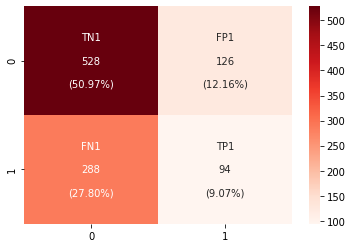

In [28]:
# Predict for test data
y_val_pred1 = clf_1.predict(X_val)
y_val_pred_proba1 = clf_1.predict_proba(X_val)

print("Random Forest Model\n")

# print classification report
result1 = classification_report(y_val, y_val_pred1)
print("\nClassification Report: Train-Set-1\n",)
print(metrics.classification_report(y_val, y_val_pred1, digits=2))

# print accuracy score
print("Train-Set-1 Balanced Accuracy Score: %.2f%%" % (metrics.balanced_accuracy_score(y_val, y_val_pred1)*100))

# calculate AUC
auc = roc_auc_score(y_val, y_val_pred1)
print('Train-Set-1 AUC: %.3f' % auc, "\n\n")

ppv = cross_val_score(clf_1, X_val, y_val, cv=10, scoring='precision')
print("%0.2f accuracy with a standard deviation of %0.2f" % (ppv.mean(), ppv.std()))

# Generate pretty Confusion Matrix
result = confusion_matrix(y_val, y_val_pred1)
group_names = ["TN1","FP1","FN1","TP1"]
group_counts = ["{0:0.0f}".format(value) for value in
                result.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     result.flatten()/np.sum(result)]

labels = [f"{v1}\n\n{v2}\n\n({v3})" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
              
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(result, annot=labels, fmt="", cmap='Reds')

Random Forest Model


Classification Report: Train-Set-2

              precision    recall  f1-score   support

           0       0.65      0.90      0.76       654
           1       0.52      0.18      0.27       382

    accuracy                           0.64      1036
   macro avg       0.59      0.54      0.51      1036
weighted avg       0.60      0.64      0.58      1036

Train-Set-2 Balanced Accuracy Score: 54.14%
Train-Set-1 AUC: 0.541 


0.47 accuracy with a standard deviation of 0.15


<AxesSubplot:>

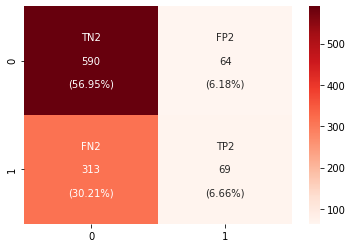

In [29]:
# Predict for test data
y_val_pred2 = clf_2.predict(X_val)
y_pred_proba2 = clf_2.predict_proba(X_val)

print("Random Forest Model\n")

# print classification report
result1 = classification_report(y_val, y_val_pred2)
print("\nClassification Report: Train-Set-2\n",)
print(metrics.classification_report(y_val, y_val_pred2, digits=2))

# print accuracy score
print("Train-Set-2 Balanced Accuracy Score: %.2f%%" % (metrics.balanced_accuracy_score(y_val, y_val_pred2)*100))

# calculate AUC
auc = roc_auc_score(y_val, y_val_pred2)
print('Train-Set-1 AUC: %.3f' % auc, "\n\n")

ppv = cross_val_score(clf_2, X_val, y_val, cv=10, scoring='precision')
print("%0.2f accuracy with a standard deviation of %0.2f" % (ppv.mean(), ppv.std()))

# Generate pretty Confusion Matrix
result = confusion_matrix(y_val, y_val_pred2)
group_names = ["TN2","FP2","FN2","TP2"]
group_counts = ["{0:0.0f}".format(value) for value in
                result.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     result.flatten()/np.sum(result)]

labels = [f"{v1}\n\n{v2}\n\n({v3})" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
              
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(result, annot=labels, fmt="", cmap='Reds')

In [30]:
# Get the predications and probabilities of train-1 on Validation Set
y_val_pred1 = clf_1.predict(X_val)
y_val_prob1 = clf_1.predict_proba(X_val).round(2)
val_pred_prob1 = y_val_prob1[np.arange(len(y_val)), y_val_pred1]
ppv = cross_val_score(clf_1, X_val, y_val, cv=10, scoring='precision')
print("%0.2f accuracy with a standard deviation of %0.2f" % (ppv.mean(), ppv.std()))

# Get the predications and probabilities of train-1 on Validation Set
y_val_pred2 = clf_2.predict(X_val)
y_val_prob2 = clf_2.predict_proba(X_val).round(2)
val_pred_prob2 = y_val_prob2[np.arange(len(y_val)), y_val_pred2]
ppv = cross_val_score(clf_1, X_val, y_val, cv=10, scoring='precision')
print("%0.2f accuracy with a standard deviation of %0.2f" % (ppv.mean(), ppv.std()))


print(len(val_pred_prob1), len(val_pred_prob2))

# Make a dataframe
# This is the train-final feature set to logistic regression
val_vote_feat=pd.DataFrame({'CWA':y_val, 'Set-1':y_val_pred1, 'Prob-1': val_pred_prob1, 
                            'Set-2':y_val_pred2, 'Prob-2': val_pred_prob2})

# print(val_vote_feat)

0.47 accuracy with a standard deviation of 0.15
0.47 accuracy with a standard deviation of 0.15
1036 1036


In [31]:
# Get the predications and probabilities of train-1 on Test Set
# This is the test-final feature set for the ensemble
y_test_pred1 = clf_1.predict(X_test)
y_test_prob1 = clf_1.predict_proba(X_test).round(2)
test_pred_prob1 = y_test_prob1[np.arange(len(y_test)), y_test_pred1]

y_test_pred2 = clf_2.predict(X_test)
y_test_prob2 = clf_2.predict_proba(X_test).round(2)
test_pred_prob2 = y_test_prob2[np.arange(len(y_test)), y_test_pred2]

# y_pred_1 = clf_1.predict(X_test)
# y_pred_2 = clf_2.predict(X_test)

print(len(test_pred_prob1), len(test_pred_prob2) )
test_vote_feat=pd.DataFrame({'CWA':y_test, 'Set-1':y_test_pred1, 'Prob-1': test_pred_prob1, 
                           'Set-2':y_test_pred2, 'Prob-2': test_pred_prob2
                           })

1036 1036


In [32]:
col_list = ['Set-1', 'Set-2']
val_vote_feat['sum'] = val_vote_feat[col_list].sum(axis=1)


all_FN=val_vote_feat[(val_vote_feat['sum'] == 0) & (val_vote_feat['CWA'] == 1)]
all_FP=val_vote_feat[(val_vote_feat['sum'] == 2) & (val_vote_feat['CWA'] == 0)]
print("All_FN count:", len(all_FN))
print("All_FP count:", len(all_FP))


All_FN count: 276
All_FP count: 51


In [33]:
from sklearn.linear_model import LogisticRegression

# col_list = ['CWA','Set-1','Prob-1','Set-2','Prob-2']
col_list = ['CWA','Set-1','Prob-1','Set-2','Prob-2']

X_train_vote = pd.DataFrame(val_vote_feat[col_list])
X_test_vote = pd.DataFrame(test_vote_feat[col_list])

# train_3, test_3 = train_test_split(df_pred_L2, test_size=0.2, random_state = 42)

X_train_vote = X_train_vote.drop(['CWA'], axis=1)
X_test_vote = X_test_vote.drop(['CWA'], axis=1)

# X_test_3 = test_3.drop(['CWA'], axis=1)

print(X_train_vote.shape, X_test_vote.shape)

clf_final = LogisticRegression()

clf_final = clf_final.fit(X_train_vote, y_val)
y_pred_final = clf_final.predict(X_test_vote)

(1036, 4) (1036, 4)


(1036,) (1036,)
Random Forest Ensemble Model


Classification Report: Train-Set Ensemble

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       653
           1       0.57      0.22      0.32       383

    accuracy                           0.65      1036
   macro avg       0.62      0.56      0.54      1036
weighted avg       0.63      0.65      0.60      1036

Train-Ensemble Balanced Accuracy Score: 56.07%
Train-Ensemble AUC: 0.561 


0.56 accuracy with a standard deviation of 0.11


<AxesSubplot:>

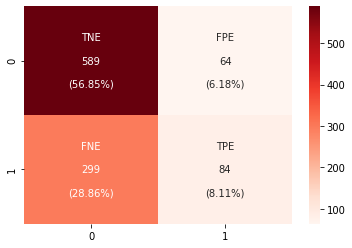

In [34]:
# Predict for test data
y_pred_final = clf_final.predict(X_test_vote)
y_pred_proba_final = clf_final.predict_proba(X_test_vote)

print(y_test.shape, y_pred_final.shape)
print("Random Forest Ensemble Model\n")

# print classification report
result1 = classification_report(y_test, y_pred_final)
print("\nClassification Report: Train-Set Ensemble\n",)
print(metrics.classification_report(y_test, y_pred_final, digits=2))

# print accuracy score
print("Train-Ensemble Balanced Accuracy Score: %.2f%%" % (metrics.balanced_accuracy_score(y_test, y_pred_final)*100))

# calculate AUC
auc = roc_auc_score(y_test, y_pred_final)
print('Train-Ensemble AUC: %.3f' % auc, "\n\n")

ppv = cross_val_score(clf_final, X_test_vote, y_test, cv=10, scoring='precision')
print("%0.2f accuracy with a standard deviation of %0.2f" % (ppv.mean(), ppv.std()))

# Generate pretty Confusion Matrix
result = confusion_matrix(y_test, y_pred_final)
group_names = ["TNE","FPE","FNE","TPE"]
group_counts = ["{0:0.0f}".format(value) for value in
                result.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     result.flatten()/np.sum(result)]

labels = [f"{v1}\n\n{v2}\n\n({v3})" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
              
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(result, annot=labels, fmt="", cmap='Reds')

In [35]:
# Check accuracy score 
# Random Forest Model (imputed NaN with most_frequent)
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
print('Model-1 accuracy score    : {0:0.4f}'. format(accuracy_score(y_val, y_val_pred1)))
print('Model-2 accuracy score    : {0:0.4f}'. format(accuracy_score(y_val, y_val_pred2)))
print('Blended accuracy score    : {0:0.4f}\n'. format(accuracy_score(y_test, y_pred_final)))


print('Blended Balanced Accuracy : {0:0.4f}'.format (balanced_accuracy_score(y_test, y_pred_final)))

Model-1 accuracy score    : 0.6004
Model-2 accuracy score    : 0.6361
Blended accuracy score    : 0.6496

Blended Balanced Accuracy : 0.5607


In [ ]:
## END OF SECTION ##

In [ ]:
## IGNORE THE REST ####

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2586
           1       0.87      0.80      0.83      1069

    accuracy                           0.91      3655
   macro avg       0.89      0.87      0.88      3655
weighted avg       0.90      0.91      0.90      3655

Confusion matrix

 [[2454  132]
 [ 213  856]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2586
           1       0.87      0.77      0.82      1069

    accuracy                           0.90      3655
   macro avg       0.89      0.86      0.88      3655
weighted avg       0.90      0.90      0.90      3655

Confusion matrix

 [[2466  120]
 [ 244  825]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      2586
           1       0.81      1.00      0.89      1069

    accuracy                           0.93      3655
   macro avg       0.90      0.95   

<AxesSubplot:>

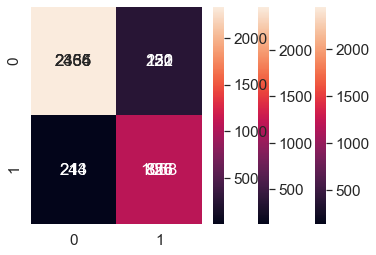

In [101]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred_1))
cm1=confusion_matrix(y_test, y_pred_1)
print('Confusion matrix\n\n', cm1)
# df_cm = pd.DataFrame(cm1, range(2), range(2))
# sns.set(font_scale=1.4) # for label size
# sns.heatmap(df_cm, annot=True, fmt='g')

print(classification_report(y_test, y_pred_2))
cm2=confusion_matrix(y_test, y_pred_2)
print('Confusion matrix\n\n', cm2)
# df_cm = pd.DataFrame(cm2, range(2), range(2))
# sns.set(font_scale=1.4) # for label size
# sns.heatmap(df_cm, annot=True, fmt='g')

print(classification_report(y_test, y_pred_final))
cm_final=confusion_matrix(y_test, y_pred_final)
print('Confusion matrix\n\n', cm_final)
df_cm = pd.DataFrame(cm_final, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, fmt='g')

In [24]:
train_0_1.head()

,district,cwa_determination,longitude,latitude,slopegradd,slopegradw,brockdepmi,wtdepannmi,wtdepaprju,flodfreqdc,flodfreqma,pondfreqpr,aws025wta,aws050wta,aws0100wta,aws0150wta,drclassdcd,drclasswet,hydgrpdcd,iccdcd,iccdcdpct,niccdcd,niccdcdpct,engdwobdcd,engdwbdcd,engdwbll,engdwbml,engstafdcd,engstafll,engstafml,engsldcd,engsldcp,englrsdcd,engcmssdcd,engcmssmp,urbrecptdc,urbrecptwt,forpehrtdc,hydclprs,awmmfpwwta,wb_ftype_artificialpath_2500m,wb_ftype_canalditch_2500m,wb_ftype_coastline_2500m,wb_ftype_connector_2500m,wb_ftype_pipeline_2500m,wb_ftype_streamriver_2500m,fl_areasqkm_sum_2500m,fl_gnis_name_ind_count_2500m,fl_totdasqkm_sum_2500m,fl_flow_type_count_2500m,fl_streamorde_sum_2500m,fl_intephem_sum_2500m,fl_startflag_sum_2500m,fl_divergence_sum_2500m,fl_length_sum_2500m,fl_ftype_artificialpath_2500m,fl_ftype_canalditch_2500m,fl_ftype_coastline_2500m,fl_ftype_connector_2500m,fl_ftype_pipeline_2500m,fl_ftype_streamriver_2500m,wb_area_sum_200m,wb_gnis_name_ind_count_200m,wb_ftype_artificialpath_200m,wb_ftype_canalditch_200m,wb_ftype_coastline_200m,wb_ftype_connector_200m,wb_ftype_pipeline_200m,wb_ftype_streamriver_200m,fl_areasqkm_sum_200m,fl_gnis_name_ind_count_200m,fl_totdasqkm_sum_200m,fl_flow_type_count_200m,fl_streamorde_sum_200m,fl_intephem_sum_200m,fl_startflag_sum_200m,fl_divergence_sum_200m,fl_length_sum_200m,fl_ftype_artificialpath_200m,fl_ftype_canalditch_200m,fl_ftype_coastline_200m,fl_ftype_connector_200m,fl_ftype_pipeline_200m,fl_ftype_streamriver_200m,nwi_feature_count_200m,nwi_wetland_list_200m,nwi_lake_200m,nwi_riverine_200m,nwi_freshwater_pond_200m,nwi_freshwater_emergent_wetland_200m,nwi_freshwater_forested_200m,nwi_shrub_wetland_200m,nwi_other_200m,nwi_estuarine_and_marine_wetland_200m,nwi_estuarine_and_marine_deepwater_200m,nwi_SYSTEM_NAME_estuarine_200m,nwi_SYSTEM_NAME_lacustrine_200m,nwi_SYSTEM_NAME_marine_200m,nwi_SYSTEM_NAME_palustrine_200m,nwi_SYSTEM_NAME_riverine_200m,nwi_CLASS_NAME_aquatic_bed_200m,nwi_CLASS_NAME_emergent_200m,nwi_CLASS_NAME_forested_200m,nwi_CLASS_NAME_reef_200m,nwi_CLASS_NAME_rock_bottom_200m,nwi_CLASS_NAME_rocky_shore_200m,nwi_CLASS_NAME_scrub-shrub_200m,nwi_CLASS_NAME_streambed_200m,nwi_CLASS_NAME_unconsolidated_bottom_200m,nwi_CLASS_NAME_unconsolidated_shore_200m,nwi_CLASS_NAME_zzz_200m,nwi_SUBCLASS_NAME_algal_200m,nwi_SUBCLASS_NAME_broad-leaved_deciduous_200m,nwi_SUBCLASS_NAME_broad-leaved_evergreen_200m,nwi_SUBCLASS_NAME_cobble-gravel_200m,nwi_SUBCLASS_NAME_coral_200m,nwi_SUBCLASS_NAME_dead_200m,nwi_SUBCLASS_NAME_deciduous_200m,nwi_SUBCLASS_NAME_evergreen_200m,nwi_SUBCLASS_NAME_floating_vascular_200m,nwi_SUBCLASS_NAME_mud_200m,nwi_SUBCLASS_NAME_needle-leaved_deciduous_200m,nwi_SUBCLASS_NAME_needle-leaved_evergreen_200m,nwi_SUBCLASS_NAME_non_persistent_200m,nwi_SUBCLASS_NAME_persistent_200m,nwi_SUBCLASS_NAME_phragmites_australis_200m,nwi_SUBCLASS_NAME_rooted_vascular_200m,nwi_SUBCLASS_NAME_rubble_200m,nwi_SUBCLASS_NAME_sand_200m,nwi_SUBCLASS_NAME_vegetated_200m,nwi_SUBCLASS_NAME_zzz_200m,nwi_SPLIT_CLASS_NAME_zzz_200m,nwi_WATER_REGIME_NAME_artificially_flooded_200m,nwi_WATER_REGIME_NAME_continuously__saturated_200m,nwi_WATER_REGIME_NAME_intermittently_exposed_200m,nwi_WATER_REGIME_NAME_intermittently_flooded_200m,nwi_WATER_REGIME_NAME_irregularly_exposed_200m,nwi_WATER_REGIME_NAME_irregularly_flooded_200m,nwi_WATER_REGIME_NAME_permanently_flooded_200m,nwi_WATER_REGIME_NAME_permanently_flooded-tidal_200m,nwi_WATER_REGIME_NAME_regularly_flooded_200m,nwi_WATER_REGIME_NAME_seasonally_flooded_200m,nwi_WATER_REGIME_NAME_seasonally_flooded-tidal_200m,nwi_WATER_REGIME_NAME_seasonally_flooded/saturated_200m,nwi_WATER_REGIME_NAME_seasonally_saturated_200m,nwi_WATER_REGIME_NAME_semipermanently_flooded_200m,nwi_WATER_REGIME_NAME_semipermanently_flooded-tidal_200m,nwi_WATER_REGIME_NAME_subtidal_200m,nwi_WATER_REGIME_NAME_temporary_flooded_200m,nwi_WATER_REGIME_NAME_temporary_flooded-tidal_200m,nwi_WATER_REGIME_NAME_zzz_200m,nwi_FIRST_MODIFIER_NAME_alkaline_200m,nwi_FIRST_MODIFIER_NAME_art

In [25]:
train_1_0 = train[train['cwa_determination']==1]
train_1_0 = train_1_0[:n]
print(train_1_0.shape)
train_1_0.head()

(3694, 305)


,district,cwa_determination,longitude,latitude,slopegradd,slopegradw,brockdepmi,wtdepannmi,wtdepaprju,flodfreqdc,flodfreqma,pondfreqpr,aws025wta,aws050wta,aws0100wta,aws0150wta,drclassdcd,drclasswet,hydgrpdcd,iccdcd,iccdcdpct,niccdcd,niccdcdpct,engdwobdcd,engdwbdcd,engdwbll,engdwbml,engstafdcd,engstafll,engstafml,engsldcd,engsldcp,englrsdcd,engcmssdcd,engcmssmp,urbrecptdc,urbrecptwt,forpehrtdc,hydclprs,awmmfpwwta,wb_ftype_artificialpath_2500m,wb_ftype_canalditch_2500m,wb_ftype_coastline_2500m,wb_ftype_connector_2500m,wb_ftype_pipeline_2500m,wb_ftype_streamriver_2500m,fl_areasqkm_sum_2500m,fl_gnis_name_ind_count_2500m,fl_totdasqkm_sum_2500m,fl_flow_type_count_2500m,fl_streamorde_sum_2500m,fl_intephem_sum_2500m,fl_startflag_sum_2500m,fl_divergence_sum_2500m,fl_length_sum_2500m,fl_ftype_artificialpath_2500m,fl_ftype_canalditch_2500m,fl_ftype_coastline_2500m,fl_ftype_connector_2500m,fl_ftype_pipeline_2500m,fl_ftype_streamriver_2500m,wb_area_sum_200m,wb_gnis_name_ind_count_200m,wb_ftype_artificialpath_200m,wb_ftype_canalditch_200m,wb_ftype_coastline_200m,wb_ftype_connector_200m,wb_ftype_pipeline_200m,wb_ftype_streamriver_200m,fl_areasqkm_sum_200m,fl_gnis_name_ind_count_200m,fl_totdasqkm_sum_200m,fl_flow_type_count_200m,fl_streamorde_sum_200m,fl_intephem_sum_200m,fl_startflag_sum_200m,fl_divergence_sum_200m,fl_length_sum_200m,fl_ftype_artificialpath_200m,fl_ftype_canalditch_200m,fl_ftype_coastline_200m,fl_ftype_connector_200m,fl_ftype_pipeline_200m,fl_ftype_streamriver_200m,nwi_feature_count_200m,nwi_wetland_list_200m,nwi_lake_200m,nwi_riverine_200m,nwi_freshwater_pond_200m,nwi_freshwater_emergent_wetland_200m,nwi_freshwater_forested_200m,nwi_shrub_wetland_200m,nwi_other_200m,nwi_estuarine_and_marine_wetland_200m,nwi_estuarine_and_marine_deepwater_200m,nwi_SYSTEM_NAME_estuarine_200m,nwi_SYSTEM_NAME_lacustrine_200m,nwi_SYSTEM_NAME_marine_200m,nwi_SYSTEM_NAME_palustrine_200m,nwi_SYSTEM_NAME_riverine_200m,nwi_CLASS_NAME_aquatic_bed_200m,nwi_CLASS_NAME_emergent_200m,nwi_CLASS_NAME_forested_200m,nwi_CLASS_NAME_reef_200m,nwi_CLASS_NAME_rock_bottom_200m,nwi_CLASS_NAME_rocky_shore_200m,nwi_CLASS_NAME_scrub-shrub_200m,nwi_CLASS_NAME_streambed_200m,nwi_CLASS_NAME_unconsolidated_bottom_200m,nwi_CLASS_NAME_unconsolidated_shore_200m,nwi_CLASS_NAME_zzz_200m,nwi_SUBCLASS_NAME_algal_200m,nwi_SUBCLASS_NAME_broad-leaved_deciduous_200m,nwi_SUBCLASS_NAME_broad-leaved_evergreen_200m,nwi_SUBCLASS_NAME_cobble-gravel_200m,nwi_SUBCLASS_NAME_coral_200m,nwi_SUBCLASS_NAME_dead_200m,nwi_SUBCLASS_NAME_deciduous_200m,nwi_SUBCLASS_NAME_evergreen_200m,nwi_SUBCLASS_NAME_floating_vascular_200m,nwi_SUBCLASS_NAME_mud_200m,nwi_SUBCLASS_NAME_needle-leaved_deciduous_200m,nwi_SUBCLASS_NAME_needle-leaved_evergreen_200m,nwi_SUBCLASS_NAME_non_persistent_200m,nwi_SUBCLASS_NAME_persistent_200m,nwi_SUBCLASS_NAME_phragmites_australis_200m,nwi_SUBCLASS_NAME_rooted_vascular_200m,nwi_SUBCLASS_NAME_rubble_200m,nwi_SUBCLASS_NAME_sand_200m,nwi_SUBCLASS_NAME_vegetated_200m,nwi_SUBCLASS_NAME_zzz_200m,nwi_SPLIT_CLASS_NAME_zzz_200m,nwi_WATER_REGIME_NAME_artificially_flooded_200m,nwi_WATER_REGIME_NAME_continuously__saturated_200m,nwi_WATER_REGIME_NAME_intermittently_exposed_200m,nwi_WATER_REGIME_NAME_intermittently_flooded_200m,nwi_WATER_REGIME_NAME_irregularly_exposed_200m,nwi_WATER_REGIME_NAME_irregularly_flooded_200m,nwi_WATER_REGIME_NAME_permanently_flooded_200m,nwi_WATER_REGIME_NAME_permanently_flooded-tidal_200m,nwi_WATER_REGIME_NAME_regularly_flooded_200m,nwi_WATER_REGIME_NAME_seasonally_flooded_200m,nwi_WATER_REGIME_NAME_seasonally_flooded-tidal_200m,nwi_WATER_REGIME_NAME_seasonally_flooded/saturated_200m,nwi_WATER_REGIME_NAME_seasonally_saturated_200m,nwi_WATER_REGIME_NAME_semipermanently_flooded_200m,nwi_WATER_REGIME_NAME_semipermanently_flooded-tidal_200m,nwi_WATER_REGIME_NAME_subtidal_200m,nwi_WATER_REGIME_NAME_temporary_flooded_200m,nwi_WATER_REGIME_NAME_temporary_flooded-tidal_200m,nwi_WATER_REGIME_NAME_zzz_200m,nwi_FIRST_MODIFIER_NAME_alkaline_200m,nwi_FIRST_MODIFIER_NAME_art

In [26]:
train_1 = pd.concat([train_0_0, train_1_0])
train_1 = train_1.sample(frac=1,random_state=42)

train_2 = pd.concat([train_0_1, train_1_0])
train_2 = train_2.sample(frac=1,random_state=43)

print(train_1.shape)
print(train_2.shape)

train_1.head()

(7388, 305)
(7388, 305)


,district,cwa_determination,longitude,latitude,slopegradd,slopegradw,brockdepmi,wtdepannmi,wtdepaprju,flodfreqdc,flodfreqma,pondfreqpr,aws025wta,aws050wta,aws0100wta,aws0150wta,drclassdcd,drclasswet,hydgrpdcd,iccdcd,iccdcdpct,niccdcd,niccdcdpct,engdwobdcd,engdwbdcd,engdwbll,engdwbml,engstafdcd,engstafll,engstafml,engsldcd,engsldcp,englrsdcd,engcmssdcd,engcmssmp,urbrecptdc,urbrecptwt,forpehrtdc,hydclprs,awmmfpwwta,wb_ftype_artificialpath_2500m,wb_ftype_canalditch_2500m,wb_ftype_coastline_2500m,wb_ftype_connector_2500m,wb_ftype_pipeline_2500m,wb_ftype_streamriver_2500m,fl_areasqkm_sum_2500m,fl_gnis_name_ind_count_2500m,fl_totdasqkm_sum_2500m,fl_flow_type_count_2500m,fl_streamorde_sum_2500m,fl_intephem_sum_2500m,fl_startflag_sum_2500m,fl_divergence_sum_2500m,fl_length_sum_2500m,fl_ftype_artificialpath_2500m,fl_ftype_canalditch_2500m,fl_ftype_coastline_2500m,fl_ftype_connector_2500m,fl_ftype_pipeline_2500m,fl_ftype_streamriver_2500m,wb_area_sum_200m,wb_gnis_name_ind_count_200m,wb_ftype_artificialpath_200m,wb_ftype_canalditch_200m,wb_ftype_coastline_200m,wb_ftype_connector_200m,wb_ftype_pipeline_200m,wb_ftype_streamriver_200m,fl_areasqkm_sum_200m,fl_gnis_name_ind_count_200m,fl_totdasqkm_sum_200m,fl_flow_type_count_200m,fl_streamorde_sum_200m,fl_intephem_sum_200m,fl_startflag_sum_200m,fl_divergence_sum_200m,fl_length_sum_200m,fl_ftype_artificialpath_200m,fl_ftype_canalditch_200m,fl_ftype_coastline_200m,fl_ftype_connector_200m,fl_ftype_pipeline_200m,fl_ftype_streamriver_200m,nwi_feature_count_200m,nwi_wetland_list_200m,nwi_lake_200m,nwi_riverine_200m,nwi_freshwater_pond_200m,nwi_freshwater_emergent_wetland_200m,nwi_freshwater_forested_200m,nwi_shrub_wetland_200m,nwi_other_200m,nwi_estuarine_and_marine_wetland_200m,nwi_estuarine_and_marine_deepwater_200m,nwi_SYSTEM_NAME_estuarine_200m,nwi_SYSTEM_NAME_lacustrine_200m,nwi_SYSTEM_NAME_marine_200m,nwi_SYSTEM_NAME_palustrine_200m,nwi_SYSTEM_NAME_riverine_200m,nwi_CLASS_NAME_aquatic_bed_200m,nwi_CLASS_NAME_emergent_200m,nwi_CLASS_NAME_forested_200m,nwi_CLASS_NAME_reef_200m,nwi_CLASS_NAME_rock_bottom_200m,nwi_CLASS_NAME_rocky_shore_200m,nwi_CLASS_NAME_scrub-shrub_200m,nwi_CLASS_NAME_streambed_200m,nwi_CLASS_NAME_unconsolidated_bottom_200m,nwi_CLASS_NAME_unconsolidated_shore_200m,nwi_CLASS_NAME_zzz_200m,nwi_SUBCLASS_NAME_algal_200m,nwi_SUBCLASS_NAME_broad-leaved_deciduous_200m,nwi_SUBCLASS_NAME_broad-leaved_evergreen_200m,nwi_SUBCLASS_NAME_cobble-gravel_200m,nwi_SUBCLASS_NAME_coral_200m,nwi_SUBCLASS_NAME_dead_200m,nwi_SUBCLASS_NAME_deciduous_200m,nwi_SUBCLASS_NAME_evergreen_200m,nwi_SUBCLASS_NAME_floating_vascular_200m,nwi_SUBCLASS_NAME_mud_200m,nwi_SUBCLASS_NAME_needle-leaved_deciduous_200m,nwi_SUBCLASS_NAME_needle-leaved_evergreen_200m,nwi_SUBCLASS_NAME_non_persistent_200m,nwi_SUBCLASS_NAME_persistent_200m,nwi_SUBCLASS_NAME_phragmites_australis_200m,nwi_SUBCLASS_NAME_rooted_vascular_200m,nwi_SUBCLASS_NAME_rubble_200m,nwi_SUBCLASS_NAME_sand_200m,nwi_SUBCLASS_NAME_vegetated_200m,nwi_SUBCLASS_NAME_zzz_200m,nwi_SPLIT_CLASS_NAME_zzz_200m,nwi_WATER_REGIME_NAME_artificially_flooded_200m,nwi_WATER_REGIME_NAME_continuously__saturated_200m,nwi_WATER_REGIME_NAME_intermittently_exposed_200m,nwi_WATER_REGIME_NAME_intermittently_flooded_200m,nwi_WATER_REGIME_NAME_irregularly_exposed_200m,nwi_WATER_REGIME_NAME_irregularly_flooded_200m,nwi_WATER_REGIME_NAME_permanently_flooded_200m,nwi_WATER_REGIME_NAME_permanently_flooded-tidal_200m,nwi_WATER_REGIME_NAME_regularly_flooded_200m,nwi_WATER_REGIME_NAME_seasonally_flooded_200m,nwi_WATER_REGIME_NAME_seasonally_flooded-tidal_200m,nwi_WATER_REGIME_NAME_seasonally_flooded/saturated_200m,nwi_WATER_REGIME_NAME_seasonally_saturated_200m,nwi_WATER_REGIME_NAME_semipermanently_flooded_200m,nwi_WATER_REGIME_NAME_semipermanently_flooded-tidal_200m,nwi_WATER_REGIME_NAME_subtidal_200m,nwi_WATER_REGIME_NAME_temporary_flooded_200m,nwi_WATER_REGIME_NAME_temporary_flooded-tidal_200m,nwi_WATER_REGIME_NAME_zzz_200m,nwi_FIRST_MODIFIER_NAME_alkaline_200m,nwi_FIRST_MODIFIER_NAME_art

In [237]:
train_2.head()

,district,cwa_determination,longitude,latitude,slopegradd,slopegradw,brockdepmi,wtdepannmi,wtdepaprju,flodfreqdc,...,transition_2_200m,transition_3_200m,transition_4_200m,transition_5_200m,transition_6_200m,transition_7_200m,transition_8_200m,transition_9_200m,county,state
6152,16,1,-77.25619,38.84579,1.0,1.0,0.0,23.0,23.0,3.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,503,51.0
6342,16,0,-77.13930,38.87329,5.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,563,51.0
10154,26,0,-81.69941,26.15319,1.0,1.0,76.0,15.0,30.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,844,12.0
12053,29,1,-75.66664,35.92312,4.0,3.8,0.0,122.0,152.0,0.0,...,0.0,0.0,1.164706,0.0,0.0,0.0,0.0,0.0,954,37.0
14330,10,1,-93.18188,45.06885,3.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,372,27.0


In [27]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
X_train = train.drop(['cwa_determination'], axis=1)
y_train = train['cwa_determination']
print(X_train.shape)
# sm = KMeansSMOTE(random_state=42)
# smote = SMOTE(random_state = 101)
# X_train,y_train = sm.fit_resample(X_train,y_train)
print(X_train.shape)

(11695, 304)
(11695, 304)


In [28]:
X_train_1 = train_1.drop(['cwa_determination'], axis=1)
X_train_2 = train_2.drop(['cwa_determination'], axis=1)

X_val = val.drop(['cwa_determination'], axis=1)
X_test = test.drop(['cwa_determination'], axis=1)


y_train_1 = train_1['cwa_determination']
y_train_2 = train_2['cwa_determination']

y_val = val['cwa_determination']
y_test = test['cwa_determination']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

import lightgbm as lgb
from sklearn.ensemble import VotingClassifier


clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_svc = SVC(probability=True, kernel='poly', degree=3, class_weight={0:2,1:1})
clf = RandomForestClassifier(n_estimators=500,random_state=42)
# clf_rf = RandomForestClassifier(n_estimators=400,random_state=42, max_depth= 80, class_weight={0:1,1:1.25},
#                              min_samples_leaf=1,oob_score='True')
clf_rf = RandomForestClassifier(n_estimators=500,random_state=42, class_weight={0:2,1:1},
                             max_depth=80, min_samples_leaf=1,oob_score='True')
# clf_rf = RandomForestClassifier(n_estimators=500,random_state=42)

clf_xgb = XGBClassifier(n_estimators=500, random_state=42)
clf_abc = AdaBoostClassifier(n_estimators=500, learning_rate=0.5, random_state=42)
clf_lgbm = lgb.LGBMClassifier(random_state = 42)
clf_gb = GradientBoostingClassifier(random_state = 42)

clf_1 = clf_rf.fit(X_train, y_train)
clf_2 = clf_xgb.fit(X_train, y_train)
clf_3 = clf_lgbm.fit(X_train, y_train)
clf_4 = clf_gb.fit(X_train, y_train)
clf_5 = clf_knn.fit(X_train, y_train)
clf_6 = clf_svc.fit(X_train, y_train)



In [ ]:

eclf = VotingClassifier(estimators=[('rf', clf_1), ('xgb', clf_2), ('lgbm', clf_3), ('gb', clf_4),
                        ('knn', clf_5), ('svc', clf_6)], weights=[1,2,2,1], voting='soft')
eclf = eclf.fit(X_train, y_train)

In [302]:
y_pred_1 = clf_1.predict(X_test)
y_pred_2 = clf_2.predict(X_test)
y_pred_3 = clf_3.predict(X_test)
y_pred_4 = clf_4.predict(X_test)
y_pred_5 = clf_5.predict(X_test)
y_pred_6 = clf_6.predict(X_test)

y_pred_final = eclf.predict(X_test)

In [307]:
# Check accuracy score 
# Random Forest Model (imputed NaN with most_frequent)
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_1)))
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_2)))
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_3)))
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_4)))
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))


print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_final)))


print('Balanced Accuracy : {0:0.4f}'.format (balanced_accuracy_score(y_test, y_pred_final)))

Model accuracy score with 100 decision-trees : 0.7729
Model accuracy score with 100 decision-trees : 0.7880
Model accuracy score with 100 decision-trees : 0.7825
Model accuracy score with 100 decision-trees : 0.7326
Model accuracy score with 100 decision-trees : 0.7791
Balanced Accuracy : 0.7435


              precision    recall  f1-score   support

           0       0.80      0.88      0.84       912
           1       0.76      0.64      0.69       550

    accuracy                           0.79      1462
   macro avg       0.78      0.76      0.77      1462
weighted avg       0.79      0.79      0.78      1462

Confusion matrix

 [[801 111]
 [199 351]]


<AxesSubplot:>

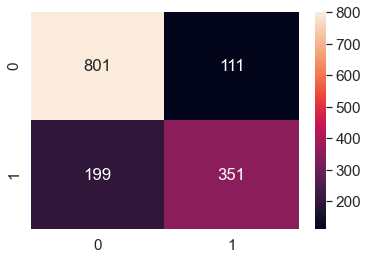

In [306]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_2))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_2)
print('Confusion matrix\n\n', cm)
df_cm = pd.DataFrame(cm, range(2), range(2))

# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
# sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
sns.heatmap(df_cm, annot=True, fmt='g')

In [249]:
y_val_pred_1 = clf_1.predict(X_val)
y_val_pred_prob_1 = clf_1.predict_proba(X_val).round(2)
val_pred_prob_1 = y_val_pred_prob_1[np.arange(len(y_val)), y_val_pred_1]

y_val_pred_2 = clf_2.predict(X_val)
y_val_pred_prob_2 = clf_2.predict_proba(X_val).round(2)
val_pred_prob_2 = y_val_pred_prob_2[np.arange(len(y_val)), y_val_pred_2]

y_val_pred_3 = clf_3.predict(X_val)
y_val_pred_prob_3 = clf_3.predict_proba(X_val).round(2)
val_pred_prob_3 = y_val_pred_prob_3[np.arange(len(y_val)), y_val_pred_3]

# print(len(val_pred_prob_1), len(val_pred_prob_2))
print(len(val_pred_prob_1), len(val_pred_prob_2), len(val_pred_prob_3))

# val_L1_feat=pd.DataFrame({'CWA':y_val, 'Set-1':y_val_pred_1, 'Prob-1': val_pred_prob_1, 
#                            'Set-2':y_val_pred_2, 'Prob-2': val_pred_prob_2})

val_L1_feat=pd.DataFrame({'CWA':y_val, 'Set-1':y_val_pred_1, 'Prob-1': val_pred_prob_1, 
                           'Set-2':y_val_pred_2, 'Prob-2': val_pred_prob_2,
                           'Set-3':y_val_pred_2, 'Prob-3': val_pred_prob_3})
print(val_L1_feat)

1462 1462 1462
       CWA  Set-1  Prob-1  Set-2  Prob-2  Set-3  Prob-3
3525     1      1    0.83      1    0.94      1    0.85
12936    1      1    0.95      1    0.95      1    0.96
2694     0      0    0.93      0    0.98      0    0.98
3956     0      0    0.74      1    0.52      1    0.64
8599     0      0    0.86      0    0.71      0    0.67
...    ...    ...     ...    ...     ...    ...     ...
8633     1      0    0.73      0    0.70      0    0.67
8231     1      0    0.61      0    0.80      0    0.77
9717     0      0    0.69      0    0.74      0    0.72
8321     0      0    0.60      0    0.53      0    0.63
4124     0      0    0.98      0    0.98      0    0.97

[1462 rows x 7 columns]


In [250]:
y_test_pred_1 = clf_1.predict(X_test)
y_test_pred_prob_1 = clf_1.predict_proba(X_test).round(2)
test_pred_prob_1 = y_test_pred_prob_1[np.arange(len(y_test)), y_test_pred_1]

y_test_pred_2 = clf_2.predict(X_test)
y_test_pred_prob_2 = clf_2.predict_proba(X_test).round(2)
test_pred_prob_2 = y_test_pred_prob_2[np.arange(len(y_test)), y_test_pred_2]

y_test_pred_3 = clf_3.predict(X_test)
y_test_pred_prob_3 = clf_3.predict_proba(X_test).round(2)
test_pred_prob_3 = y_test_pred_prob_3[np.arange(len(y_test)), y_test_pred_3]

y_pred_1 = clf_1.predict(X_test)
y_pred_2 = clf_2.predict(X_test)
y_pred_3 = clf_3.predict(X_test)


print(len(test_pred_prob_1), len(test_pred_prob_2), len(test_pred_prob_3) )
# test_L1_feat=pd.DataFrame({'CWA':y_test, 'Set-1':y_test_pred_1, 'Prob-1': test_pred_prob_1, 
#                            'Set-2':y_test_pred_2, 'Prob-2': test_pred_prob_2
#                            })
test_L1_feat=pd.DataFrame({'CWA':y_test, 'Set-1':y_test_pred_1, 'Prob-1': test_pred_prob_1, 
                           'Set-2':y_test_pred_2, 'Prob-2': test_pred_prob_2,
                           'Set-3':y_test_pred_2, 'Prob-3': test_pred_prob_3})
print(test_L1_feat)

1462 1462 1462
      CWA  Set-1  Prob-1  Set-2  Prob-2  Set-3  Prob-3
5886    0      0    0.51      1    0.75      1    0.80
8966    1      0    0.68      0    0.70      0    0.70
1360    0      0    0.88      0    0.91      0    0.88
9146    0      0    0.78      0    0.73      0    0.63
5065    0      0    0.87      0    0.94      0    0.98
...   ...    ...     ...    ...     ...    ...     ...
9436    1      1    0.53      1    0.54      1    0.54
1063    1      0    0.63      0    0.94      0    0.88
8360    0      0    0.60      0    0.66      0    0.67
8999    0      0    0.72      0    0.64      0    0.66
1332    0      0    0.94      0    0.93      0    0.91

[1462 rows x 7 columns]


In [251]:
val_L1_feat['diff1'] = val_L1_feat['Set-1']-val_L1_feat['Set-2'].values
val_L1_feat['diff2'] = val_L1_feat['Set-2']-val_L1_feat['Set-3'].values


val_L1_feat['prob_diff'] = val_L1_feat['Prob-1']-val_L1_feat['Prob-2'].values

# diff = pd.DataFrame({'diff':level_1_feat['Set-1']-level_1_feat['Set-2']})
# print(diff[diff['diff']==1])
# one_wrong = val_L1_feat[val_L1_feat['diff'] != 0]
# print(len(one_wrong))

all_wrong=val_L1_feat[(val_L1_feat['Set-1'] != val_L1_feat['CWA']) & 
                       (val_L1_feat['Set-2'] != val_L1_feat['CWA']) & 
                       (val_L1_feat['Set-3'] != val_L1_feat['CWA'])]
print("All wrong count:", len(all_wrong))

# level_1_feat['prob_diff'].max()
val_L1_feat.loc[val_L1_feat['prob_diff'].idxmax()]
val_L1_feat.loc[val_L1_feat['prob_diff'] > 0.3]

All wrong count: 257


,CWA,Set-1,Prob-1,Set-2,Prob-2,Set-3,Prob-3,diff1,diff2,prob_diff
4102,1,0,0.92,0,0.56,0,0.70,0,0,0.36
9441,0,0,0.97,0,0.66,0,0.67,0,0,0.31


In [271]:
# df_val=pd.concat([x_val, val_pred1,val_pred2],axis=1)
# df_test=pd.concat([x_test, test_pred1,test_pred2],axis=1)

# model = LogisticRegression()
# model.fit(df_val,y_val)
# model.score(df_test,y_test)
from sklearn.linear_model import LogisticRegression




# col_list = ['CWA','Set-1','Prob-1','Set-2','Prob-2']
col_list = ['CWA','Set-1','Prob-1','Set-2','Prob-2', 'Set-3','Prob-3']

X_train_3 = pd.DataFrame(val_L1_feat[col_list])
X_test_3 = pd.DataFrame(test_L1_feat[col_list])
print(X_train_3.shape)

# train_3, test_3 = train_test_split(df_pred_L2, test_size=0.2, random_state = 42)

X_train_3 = X_train_3.drop(['CWA'], axis=1)
X_test_3 = X_test_3.drop(['CWA'], axis=1)

# X_test_3 = test_3.drop(['CWA'], axis=1)

print(X_train_3.shape)
# y_train_3 = train_3['CWA']
# y_test_3 = test_3['CWA']


clf_rfr_final = RandomForestClassifier()
clf_log_final = LogisticRegression()
clf_gb_final = GradientBoostingClassifier()

clf_final = clf_log_final.fit(X_train_3, y_val)
y_pred_final = clf_final.predict(X_test_3)


(1462, 7)
(1462, 6)


In [272]:
from sklearn.ensemble import VotingClassifier


In [273]:
# Check accuracy score 
# Random Forest Model (imputed NaN with most_frequent)
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_1)))
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_2)))
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_3)))
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_final)))


print('Balanced Accuracy : {0:0.4f}'.format (balanced_accuracy_score(y_test, y_pred_final)))

Model accuracy score with 100 decision-trees : 0.7804
Model accuracy score with 100 decision-trees : 0.7852
Model accuracy score with 100 decision-trees : 0.7934
Model accuracy score with 100 decision-trees : 0.7798
Balanced Accuracy : 0.7639


In [159]:
len(clf.feature_importances_)

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

Confusion matrix

 [[814  98]
 [204 346]]


<AxesSubplot:>

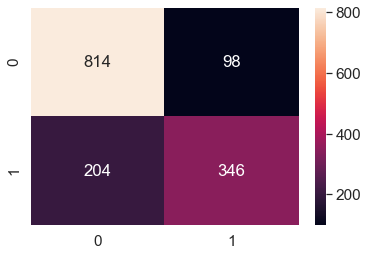

In [274]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_3)
print('Confusion matrix\n\n', cm)
df_cm = pd.DataFrame(cm, range(2), range(2))

# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
# sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
sns.heatmap(df_cm, annot=True, fmt='g')

In [173]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       912
           1       0.76      0.61      0.68       550

    accuracy                           0.78      1462
   macro avg       0.78      0.75      0.76      1462
weighted avg       0.78      0.78      0.78      1462



In [38]:
len(clf.feature_importances_)

31

In [39]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    #fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True))

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(20,200))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

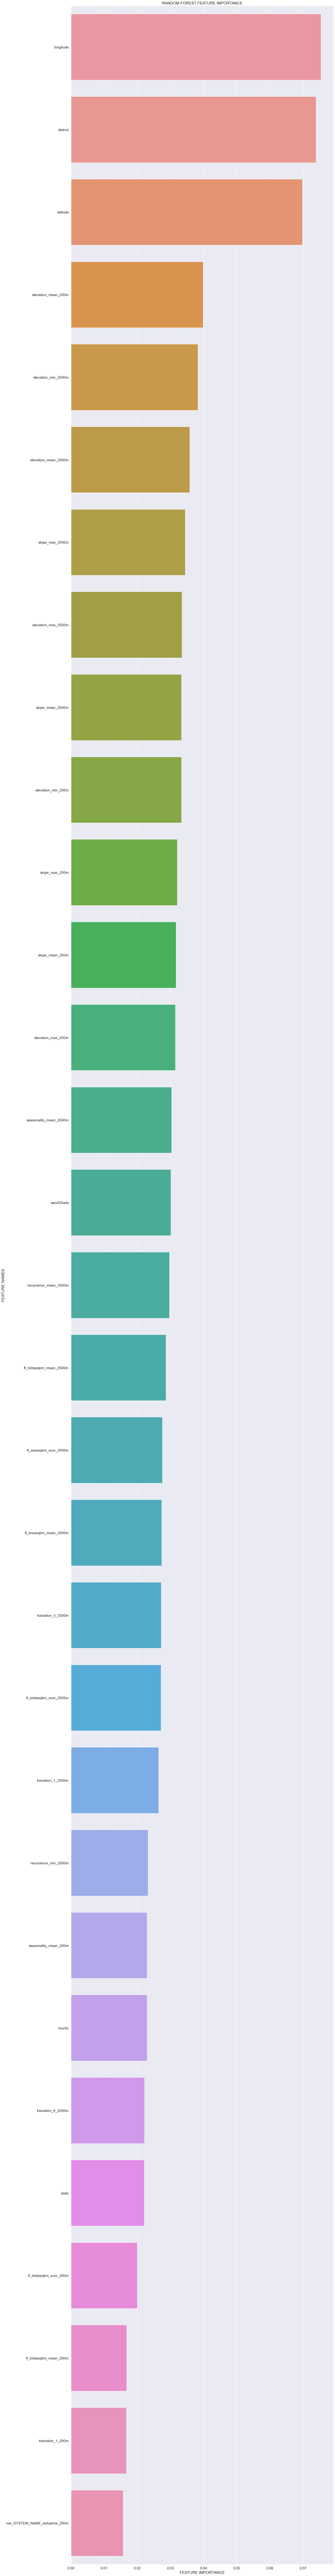

In [40]:
plot_feature_importance(clf.feature_importances_,X_train.columns,'RANDOM FOREST')

In [41]:
feature_importance = np.array(clf.feature_importances_)
feature_names = np.array(X_train.columns)

data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
#fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True))

fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

In [42]:
fi_df

,feature_names,feature_importance
0,longitude,0.075431
2,district,0.073939
1,latitude,0.069779
7,elevation_mean_200m,0.039867
22,elevation_min_2500m,0.038296
15,elevation_mean_2500m,0.035822
19,slope_max_2500m,0.034433
21,elevation_max_2500m,0.033466
17,slope_mean_2500m,0.033325
5,elevation_min_200m,0.033300


In [43]:
list(fi_df['feature_names'])

['longitude',
 'district',
 'latitude',
 'elevation_mean_200m',
 'elevation_min_2500m',
 'elevation_mean_2500m',
 'slope_max_2500m',
 'elevation_max_2500m',
 'slope_mean_2500m',
 'elevation_min_200m',
 'slope_max_200m',
 'slope_mean_200m',
 'elevation_max_200m',
 'seasonality_mean_2500m',
 'aws025wta',
 'recurrence_mean_2500m',
 'fl_totdasqkm_mean_2500m',
 'fl_areasqkm_sum_2500m',
 'fl_areasqkm_mean_2500m',
 'transition_5_2500m',
 'fl_totdasqkm_sum_2500m',
 'transition_1_2500m',
 'recurrence_min_2500m',
 'seasonality_mean_200m',
 'county',
 'transition_6_2500m',
 'state',
 'fl_totdasqkm_sum_200m',
 'fl_totdasqkm_mean_200m',
 'transition_1_200m',
 'nwi_SYSTEM_NAME_estuarine_200m']